## 1 Entendendo o problema
  O naufrágio do Titanic, ocorrido em 1912, é um dos exemplos mais famosos na área de machine learning na exploração de um conjunto de dados reais fornecidos para aolicação de um modelo de predição a fim de estimar com certo grau de acurácia o número de sobreviventes.
  Para que seja possível obter um bom resultado, é necessário previamente realizar a preparação dos dados. O entendimento da relação entre os datasets de passageiros e se ele sobreviveu ou não é fundamental para obtermos àquelas de maior relevância para utilizar no modelo de predição.

## Objetivo
  Este trabalho consiste em realizar a análise e exploração de um conjunto de dados categóricos e numéricos, deixando-os preparados para as inferências. 

## 2 Análise dos dados

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/IPTI_challenges/c2-Titanic/Carol/Train.xlsx")
test = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/IPTI_challenges/c2-Titanic/Carol/Test.xlsx")

In [ ]:
# Dados para treinamento
print("Número total de passageiros nos dados de treinamento", len(train.Kaggle_Pass_Id.unique()))
train.head()

Número total de passageiros nos dados de treinamento 891


,Kaggle_Pass_Id,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,orig_seq
0,1,3,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN,"Bridgerule, Devon",690
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4,NaN,"New York, NY",86
2,3,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN,NaN,861
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,D,NaN,"Scituate, MA",128
4,5,3,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN,"Lower Clapton, Middlesex or Erdington, Birmingham",619


In [ ]:
# Dados para teste
print("Número total de passageiros nos dados de teste", len(test.Kaggle_Pass_Id.unique()))
test.head()

Número total de passageiros nos dados de teste 418


,Kaggle_Pass_Id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,orig_seq
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN,70.0,NaN,925
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN,NaN,NaN,1291
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN,NaN,"Cambridge, MA",512
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN,131.0,NaN,1297
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,15,NaN,NaN,868


In [ ]:
train.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Kaggle_Pass_Id,891,NaN,NaN,NaN,446,257.354,1,223.5,446,668.5,891
pclass,891,NaN,NaN,NaN,2.30864,0.836071,1,2,3,3,3
survived,891,NaN,NaN,NaN,0.383838,0.486592,0,0,0,1,1
name,891,891,"Burns, Miss. Elizabeth Margaret",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,714,NaN,NaN,NaN,29.6991,14.5265,0.4167,20.125,28,38,80
sibsp,891,NaN,NaN,NaN,0.523008,1.10274,0,0,0,1,8
parch,891,NaN,NaN,NaN,0.381594,0.806057,0,0,0,0,6
ticket,891,688,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fare,891,NaN,NaN,NaN,32.2042,49.6934,0,7.9104,14.4542,31,512.329


Observando as variáveis, pode-se perceber algumas características que as difere umas das outras. Para uma melhor compreensão dos dados, iremos separá-los como dados categóricoss e numéricos. Isso trará maior clareza na análise exploratória dos dados.

In [ ]:
# Tipos dos dados de treinamento

data_types = train.dtypes
print(data_types)

Kaggle_Pass_Id      int64
pclass              int64
survived            int64
name               object
sex                object
age               float64
sibsp               int64
parch               int64
ticket             object
fare              float64
cabin              object
embarked           object
boat               object
body              float64
home.dest          object
orig_seq            int64
dtype: object


Variáveis categóricas são aquelas representadas por palavras, letras isoladas ou letras mais números. Já as variáveis numéricas são separadas por valores numéricos que podem ser do tipo discreto (inteiros) ou contínuo (float).

In [ ]:
# Separando as variaveis categóricas

import copy

categ_train = train.select_dtypes(include = ['object']).copy()
categ_train.head()

,name,sex,ticket,cabin,embarked,boat,home.dest
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S,NaN,"Bridgerule, Devon"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C,4,"New York, NY"
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S,NaN,NaN
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S,D,"Scituate, MA"
4,"Allen, Mr. William Henry",male,373450,NaN,S,NaN,"Lower Clapton, Middlesex or Erdington, Birmingham"


In [ ]:
# Separando as variaveis numericas

numerical_train = train.select_dtypes(include = ['int64','float64']).copy()
numerical_train.head()

,Kaggle_Pass_Id,pclass,survived,age,sibsp,parch,fare,body,orig_seq
0,1,3,0,22.0,1,0,7.2500,NaN,690
1,2,1,1,38.0,1,0,71.2833,NaN,86
2,3,3,1,26.0,0,0,7.9250,NaN,861
3,4,1,1,35.0,1,0,53.1000,NaN,128
4,5,3,0,35.0,0,0,8.0500,NaN,619


Após a separação das variáveis, pode-se descrevê-las como:


1.   Variáveis numéricas: PassengerId, Survived, Pclass, Age, SibSp, Parch, Fare.
    * contínuas: age, fare 
    * discretas: Kaggle_Pass_Id, survived, pclass, sibsp, parch, orig_seq
2.   Variáveis categóricas: name, sex, ticket, cabin, embarked, boat, home.dest



*Dentro* do conjunto de dados, deve-se realizar um filtro para separar as variáveis que possuem dados ausentes e *outliers*

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Retirando a média dos dados ausentes
missing_values = train.isnull().mean()*100
print(missing_values)

Kaggle_Pass_Id     0.000000
pclass             0.000000
survived           0.000000
name               0.000000
sex                0.000000
age               19.865320
sibsp              0.000000
parch              0.000000
ticket             0.000000
fare               0.000000
cabin             77.104377
embarked           0.224467
boat              62.962963
body              90.684624
home.dest         43.995511
orig_seq           0.000000
dtype: float64


A porcentagem dos dados ausentes para age, cabin, embarked, boat, body e home.dest são:

          *   Age: 19.86%
          *   Cabin: 77.10%
          *   Embarked: 0.22%
          *   boat: 62.96%
          *   body: 90.68%
          *   home.dest: 43.99%   

**Verificando os *outliers* dos dados numéricos**

Histograma de *idade* e *tarifa de ambarque* em relação a quantidade de passageiros. 

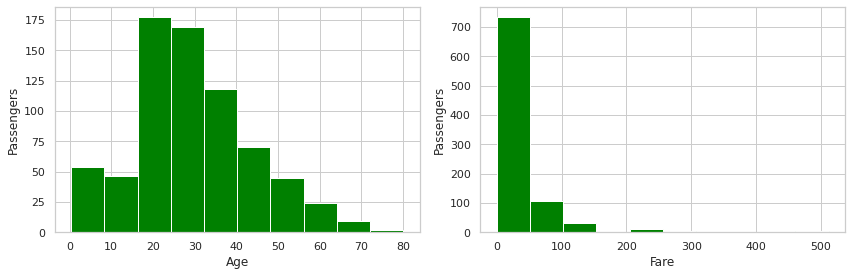

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.hist(train['age'], color ='green')
plt.xlabel('Age')
plt.ylabel('Passengers')

plt.subplot(1,2,2)
plt.hist(train['fare'], color ='green')
plt.xlabel('Fare')
plt.ylabel('Passengers')

plt.show()

*Outliers* nas variáveis numéricas

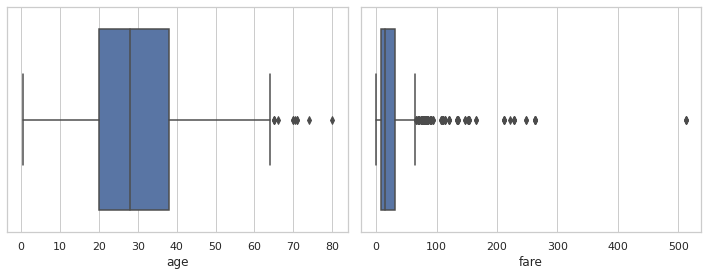

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
sns.boxplot(data=train,x=train['age'])

plt.subplot(1,2,2)
sns.boxplot(x='fare', y=None, data=train)

plt.show()

A maioria dos passageiros corresponde a idade adulta, e o valor da tarifa concentra-se menor do que 100.
Apesar das idades descrepantes, sua relação com o numero de sobreviventes é relevante para indicar os sobreviventes de idades mais avançadas. 

Nos gráficos abaixo pode-se ver a distribuição da idade e tarifa de embarque por quantidade de passageiros.

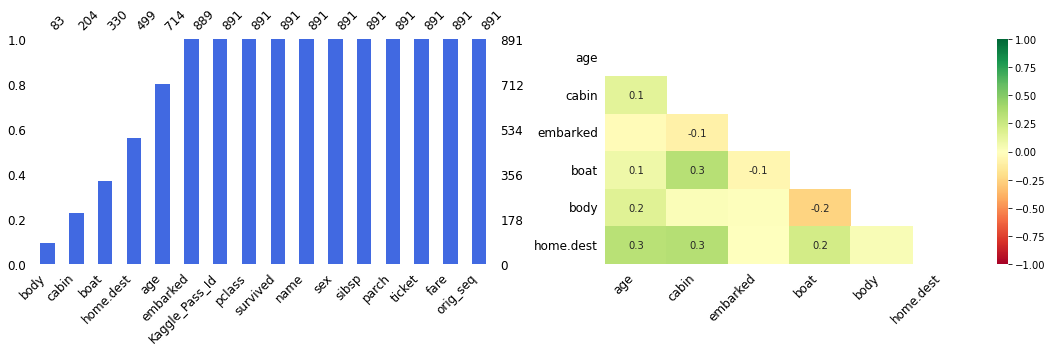

In [ ]:
# Plotando todos os dados em barras

# Correlação entre os valores ausentes das variaveis que apresentam valores ausentes

# O gráfico exibe a correlação de nulidade entre as colunas do conjunto de dados. Isso nos permite entender como o valor ausente de uma coluna está relacionado 
# aos valores ausentes em outras colunas.

fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(1,2,1)
msno.bar(train, fontsize=12, sort="ascending", color = 'royalblue', ax=ax1)

ax2 = fig.add_subplot(1,2,2)
msno.heatmap(train, cmap="RdYlGn", fontsize=12, ax=ax2)

plt.tight_layout()

### * Passageiros, idade e tarifa de embarque

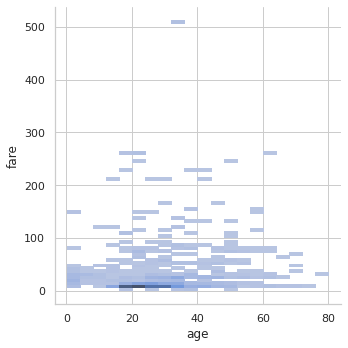

In [ ]:
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.autolayout"] = True
# x = np.arange(0, 80, 20)
# x = np.linspace(0,20,80)
# sns.plot(x='age',y='fare', hue = None, data=train, ci = None)
# sns.histplot(data=train, x="age", y = 'fare', hue=None, multiple="stack")
sns.displot(data=train, x="age", y = 'fare', hue=None)
# ax.set_xticks(20,labels=None)
plt.show()

### Gênero

Total de passageiros *versus* Número de homens e mulheres.

Total de passageiros sobreviventes por gênero

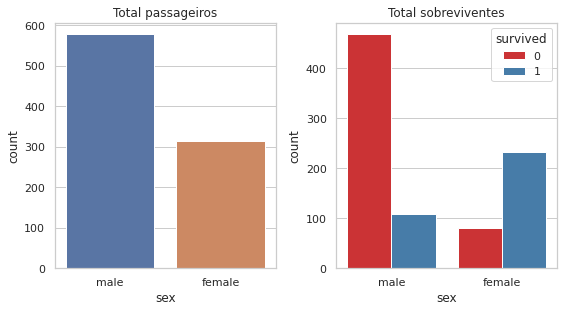


 O total de passageiros por gênero é:

|        |   sex |
|:-------|------:|
| male   |   577 |
| female |   314 |

 O total de sobreviventes por gênero é:
| sex    |   survived |
|:-------|-----------:|
| female |        233 |
| male   |        109 |


In [ ]:
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = [8.00, 4.50]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)
sns.countplot(x="sex", order=["male", "female"], ax=axes[0], data=train).set(title='Total passageiros')
sns.countplot(x="sex", y=None, hue = 'survived', order=["male", "female"], ax=axes[1], data=train, palette = 'Set1').set(title='Total sobreviventes')

plt.show()

print('\n O total de passageiros por gênero é:\n')
print(train['sex'].value_counts().to_markdown())
print('\n O total de sobreviventes por gênero é:')
print(train.groupby('sex').sum()['survived'].to_markdown())


In [ ]:
total_males = (train["sex"] == 'male').value_counts()
total_females = (train["sex"] == 'female').value_counts()

total_passengers = total_males+total_females

perc_males = (total_males/total_passengers)*100
perc_females = (total_females/total_passengers)*100

print(perc_males)
print('\n', perc_females)

False    35.241302
True     64.758698
Name: sex, dtype: float64

 False    64.758698
True     35.241302
Name: sex, dtype: float64


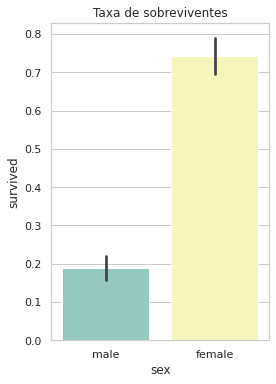


 A porcentagem de sobrevivencia de mulheres foi: 74.20

 A porcentagem de sobrevivencia de homens foi: 18.89


In [ ]:
plt.rcParams["figure.figsize"] = [4.00, 5.50]
sns.barplot(x='sex',y="survived", hue = None, data=train, order=["male", "female"],palette = 'Set3' ).set(title='Taxa de sobreviventes')
plt.show()

surv_females=train["survived"][train["sex"] == 'female'].value_counts(normalize = True)[1]*100
surv_male=train["survived"][train["sex"] == 'male'].value_counts(normalize = True)[1]*100

print('\n A porcentagem de sobrevivencia de mulheres foi:', "%.2f" % surv_females)

print('\n A porcentagem de sobrevivencia de homens foi:', "%.2f" % surv_male)



As mulheres tiveram 74,20% de chance de sobreviver em comparação com 18,89% dos homens. Isso mostra uma variável importante para considerar nas demais análises, onde a relação com a quantidade de homens e mulheres estará sempre presente.

### Classe

Quantidade de passageiros por gênero *versus* Classe

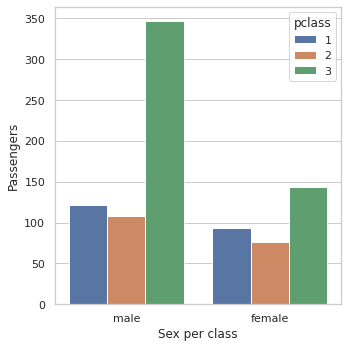

In [ ]:
plt.rcParams["figure.figsize"] = [5.00, 5]
sns.set_theme(style="whitegrid")
sns.countplot(x="sex", hue="pclass", data=train)
plt.xlabel('Sex per class')
plt.ylabel('Passengers')

plt.show()

Taxa de Sobreviventes *versus* Classe

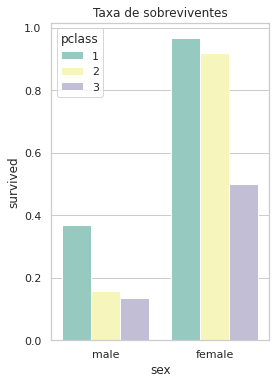

In [ ]:
plt.rcParams["figure.figsize"] = [4.00, 5.50]
sns.barplot(x='sex',y="survived", hue = 'pclass', data=train, order=["male", "female"],palette = 'Set3', ci = None ).set(title='Taxa de sobreviventes')
plt.show()


Quantidade de homens e mulheres que sobreviveram e que não sobreviveram, de acordo com cada classe

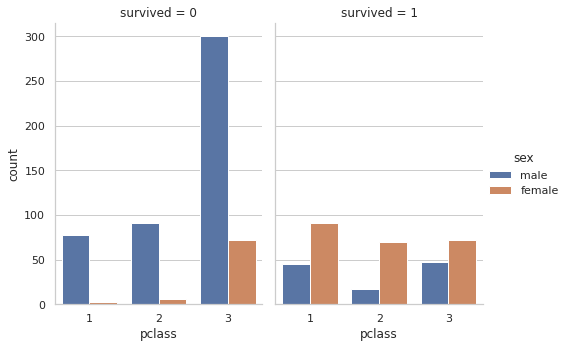

In [ ]:
sns.catplot(x="pclass", hue="sex", col="survived", data=train, kind="count", height=5, aspect=.7)
plt.show()

In [ ]:
male_survivors = train[train.sex.isin(['male'])].merge(train[train.survived.isin([1])])
num_male_class_survived = male_survivors['pclass'].value_counts()

female_survivors = train[train.sex.isin(['female'])].merge(train[train.survived.isin([1])])
num_female_class_survived = female_survivors['pclass'].value_counts()

total_females_survived = train[train.sex.isin(['female'])].sum()['survived']
total_males_survived = train[train.sex.isin(['male'])].sum()['survived']

print('homens que sobreviveram por classe \n', num_male_class_survived)
print('\n mulheres que sobreviveram por classe \n', num_female_class_survived)

De acordo com cada classe e gênero, a quantidade de sobreviventes foram:

      Homens: 1a classe 47, 2a classe 45, 3a classe 17
      Mulheres: 1a classe 91, 2a classe 72, 3a classe 70

Segundo o gráfico da taxa de sobreviventes por classe, mulheres da 1a e 2a classe tiveram mais de 80% de chance de sobreviver, enquanto que na 3a classe essa chance cai entre 40-50%. 

### Idade

A variável 'age' será dividida em grupos de passageiros por idade, afim de obter-se uma relação mais clara entre as variáveis de classe e relação familiar ('pclass', 'parch', 'sibsp') e quais grupos de pessoas tiveram mais chances de sobreviver ou não.

In [ ]:
train["age"] = train["age"].fillna(train["age"].median())
test["age"] = test["age"].fillna(train["age"].median())

In [ ]:
new_train = train.copy()
# new_train.head()

Os grupos por faixa etária são definidos como:

    baby: 0-2
    child: 2-10
    teenager: 10-18
    adult: 18-50
    older_adult: 50-85 


In [ ]:
bins = [0,2,10,18,50,85]
age_groups = ['baby','child','teenager','adult','older_adult']
new_train['age'] = pd.cut(new_train['age'],bins,labels = age_groups)

Quantidade de pessoas por grupos de idade

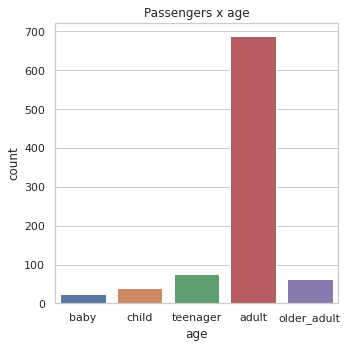

In [ ]:
plt.rcParams["figure.figsize"] = [5, 5]
sns.countplot(x="age", data=new_train).set(title='Passengers x age')
plt.show()

Taxa de sobreviventes por faixa de idade

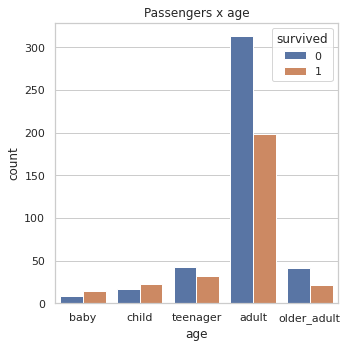

In [ ]:
plt.rcParams["figure.figsize"] = [5, 5]
sns.countplot(x="age", hue = 'survived', data=new_train).set(title='Passengers x age')
plt.show()

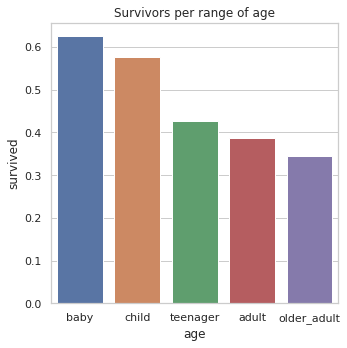

In [ ]:
plt.rcParams["figure.figsize"] = [5, 5]
sns.barplot(x="age", y="survived", data=new_train, ci = None).set(title='Survivors per range of age')
plt.show()

Taxa de sobreviventes por faixa de idade em relação a cada classe

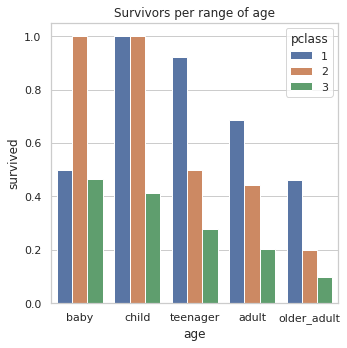

In [ ]:
sns.barplot(x="age", y="survived", hue = 'pclass', data=new_train, ci = None).set(title='Survivors per range of age')
plt.show()

In [ ]:
baby_survivors = new_train[new_train.age.isin(['baby'])].merge(new_train[new_train.survived.isin([1])])
baby_survivors_class = baby_survivors['pclass'].value_counts()

child_survivors = new_train[new_train.age.isin(['child'])].merge(new_train[new_train.survived.isin([1])])
child_survivors_class = child_survivors['pclass'].value_counts()

teen_survivors = new_train[new_train.age.isin(['teenager'])].merge(new_train[new_train.survived.isin([1])])
teen_survivors_class = teen_survivors['pclass'].value_counts()

adult_survivors = new_train[new_train.age.isin(['adult'])].merge(new_train[new_train.survived.isin([1])])
adult_survivors_class = adult_survivors['pclass'].value_counts()

olders_survivors = new_train[new_train.age.isin(['older_adult'])].merge(new_train[new_train.survived.isin([1])])
olders_survivors_class = olders_survivors['pclass'].value_counts()

print('baby \n', baby_survivors_class)
print('\n teenagers \n', teen_survivors_class)
print('\n child \n', child_survivors_class)
print('\n adults \n', adult_survivors_class)
print('\n older adults \n', olders_survivors_class)

# adult_survivors_class
# olders_survivors_class

Sobreviventes em cada classe:

    baby: 1a-7, 2a-7, 3a-1
    child: 1a-12, 2a-10, 3a-1
    teenager: 1a-14, 2a-12, 3a-6
    adults: 1a-90, 2a-57, 3a-51
    older adults: 1a-18, 2a-3, 3a-1


### Relação familiar Parch (pais/filhos a bordo)

Gênero dos passageiros por idade em relação a variável Parch

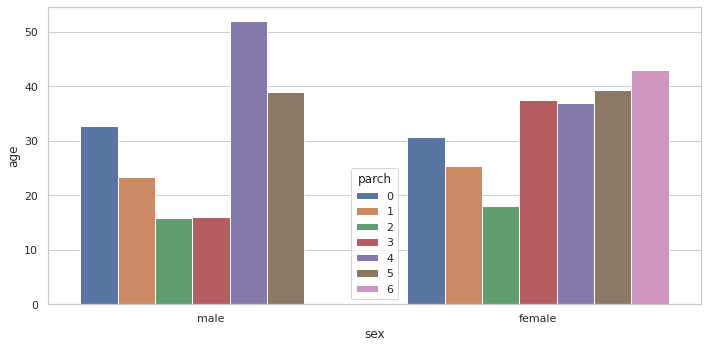

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,5))
sns.barplot(x="sex", y="age", hue = 'parch', data=train, ci = None)
plt.show()

Homens:

    ~30: viajavam sozinhos
    ~50: tinham relação familiar com 4 pessoas
    ~15: tinham relação familiar com até 2/3 pessoas
Mulheres:

    ~40: tinham relação familiar com até 6 pessoas
    ~30: estavam sozinhas
    ~18: tinham relação familiar com até 2 pessoas

Taxa de sobreviventes por homens e mulheres em relaçã a Parch

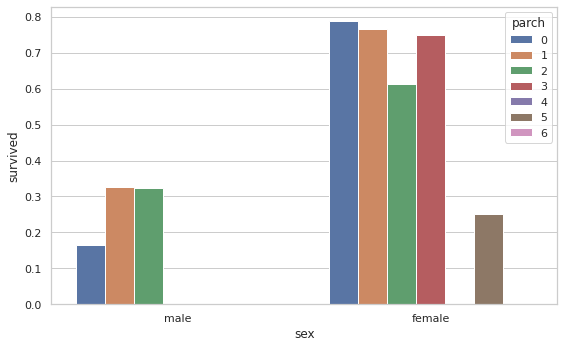

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8,5))
sns.barplot(x="sex", y="survived", hue = 'parch', data=new_train, order=["male", "female"], ci = None)
plt.show()

Mulheres que estavam sozinhas ou acompanhadas com até três parentes tiveram entre 60-70% de chance de sobreviver.
Homens que estavam sozinhos, a taxa de sobreviência cai entre 10-20% e os que estavam acompanhados de até dois parente, a taxa está em torno de 30%

### Relação familiar sibsp (irmãos/cônjuges a bordo)

Quantidade de passageiros por relação familiar 'sibsp'

<Figure size 864x360 with 0 Axes>

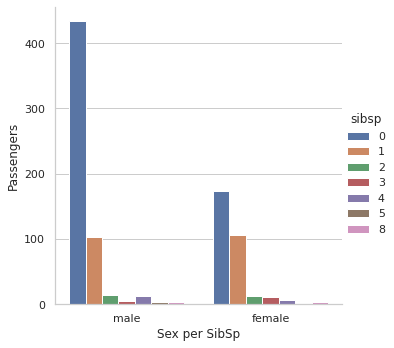

In [ ]:
plt.figure(figsize=(12,5))
sns.catplot(x="sex", hue="sibsp", kind="count", data=new_train)
plt.xlabel('Sex per SibSp')
plt.ylabel('Passengers')
plt.show()

Taxa de sobreviventes de homens e mulheres por relação familiar 'sibsp'

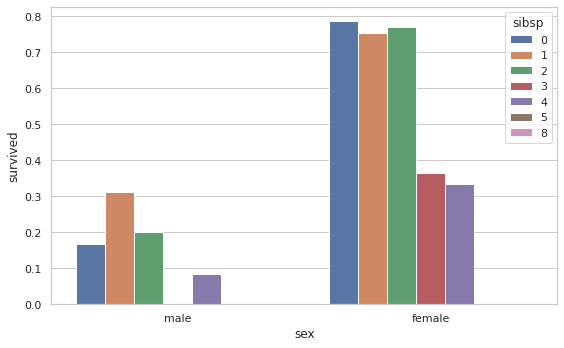

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8,5))
sns.barplot(x="sex", y="survived", hue = 'sibsp', data=train, order=["male", "female"], ci = None)
plt.show()

MULHERES:

    viajaram sozinhas, ou acompanhadas de cônjuges e/ou filhos até uma quantidade de duas pessoas tiveram entre 70-80% de chance de sobreviver

HOMENS:

    viajaram sozinhos tiveram entre 15-20% de chance de sobreviver
    viajaram acompanhados com cônjuge ou filho tiveram em torno de 30% de chance de sobreviver.
    viajaram acompanhados de cônjuge e/ou filhos tiveram 20% de chance de sobreviver.

## 3 Preparação dos dados

Essa é a etapa de preparação e limpeza dos dados para as inferências. Será retirado dos conjuntos de treino e teste as variáveis de menor relevância: Kaggle_Pass_Id, name, cabin, home.dest e ori_seq . As variáveis body e boat também serão retiradas por conter muitos dados ausentes.

In [ ]:
Train = train.copy()
Train = Train.drop(['name'], axis = 1)
Train = Train.drop(['ticket'], axis = 1)
Train = Train.drop(['cabin'], axis = 1)
Train = Train.drop(['home.dest'], axis = 1)
Train = Train.drop(['orig_seq'], axis = 1)
Train = Train.drop(['body'], axis = 1)
Train = Train.drop(['boat'], axis = 1)

In [ ]:
bins = [0,2,10,18,50,85]
age_groups = ['baby','child','teenager','adult','older_adult']
Train['age'] = pd.cut(Train['age'],bins,labels = age_groups)

In [ ]:
Train.head()

,Kaggle_Pass_Id,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,3,0,male,adult,1,0,7.2500,S
1,2,1,1,female,adult,1,0,71.2833,C
2,3,3,1,female,adult,0,0,7.9250,S
3,4,1,1,female,adult,1,0,53.1000,S
4,5,3,0,male,adult,0,0,8.0500,S


In [ ]:
Test = test.copy()
Test = Test.drop(['name'], axis = 1)
Test = Test.drop(['ticket'], axis = 1)
Test = Test.drop(['cabin'], axis = 1)
Test = Test.drop(['home.dest'], axis = 1)
Test = Test.drop(['orig_seq'], axis = 1)
Test = Test.drop(['body'], axis = 1)
Test = Test.drop(['boat'], axis = 1)

In [ ]:
bins = [0,2,10,18,50,85]
age_groups = ['baby','child','teenager','adult','older_adult']
Test['age'] = pd.cut(Test['age'],bins,labels = age_groups)

In [ ]:
Test.head()

,Kaggle_Pass_Id,pclass,sex,age,sibsp,parch,fare,embarked
0,892,3,male,adult,0,0,7.8292,Q
1,893,3,female,adult,1,0,7.0000,S
2,894,2,male,older_adult,0,0,9.6875,Q
3,895,3,male,adult,0,0,8.6625,S
4,896,3,female,adult,1,1,12.2875,S


Como foi visto que 'fare' possui valores outliers, esses serão substituídos pelo maior valor dentro do limite máximo.

In [ ]:
Train.sort_values("fare", ascending=False).head()

,Kaggle_Pass_Id,pclass,survived,sex,age,sibsp,parch,fare,embarked
258,259,1,1,female,35.0,0,0,512.3292,C
737,738,1,1,male,35.0,0,0,512.3292,C
679,680,1,1,male,36.0,0,1,512.3292,C
88,89,1,1,female,23.0,3,2,263.0000,S
27,28,1,0,male,19.0,3,2,263.0000,S


In [ ]:
Test.sort_values("fare", ascending=False).head()

,Kaggle_Pass_Id,pclass,sex,age,sibsp,parch,fare,embarked
343,1235,1,female,58.0,0,1,512.3292,C
53,945,1,female,28.0,3,2,263.0000,S
69,961,1,female,60.0,1,4,263.0000,S
24,916,1,female,48.0,1,3,262.3750,C
142,1034,1,male,61.0,1,3,262.3750,C


In [ ]:
Train['fare'] = Train['fare'].replace(512.3292, 300)
Test['fare'] = Test['fare'].replace(512.3292, 300)

Valores ausentes

In [ ]:
Train.isnull().sum()

Kaggle_Pass_Id    0
pclass            0
survived          0
sex               0
age               0
sibsp             0
parch             0
fare              0
embarked          2
dtype: int64

In [ ]:
Test.isnull().sum()

Kaggle_Pass_Id    0
pclass            0
sex               0
age               0
sibsp             0
parch             0
fare              1
embarked          0
dtype: int64

In [ ]:
Train[Train["embarked"].isnull()]

,Kaggle_Pass_Id,pclass,survived,sex,age,sibsp,parch,fare,embarked
61,62,1,1,female,38.0,0,0,80.0,NaN
829,830,1,1,female,62.0,0,0,80.0,NaN


In [ ]:
Train['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [ ]:
Train["embarked"] = Train["embarked"].fillna("S")

In [ ]:
Test[Test["fare"].isnull()]

,Kaggle_Pass_Id,pclass,sex,age,sibsp,parch,fare,embarked
152,1044,3,male,60.5,0,0,NaN,S


In [ ]:
Test[["pclass","fare"]].groupby("pclass").mean()

,fare
pclass,
1,92.295912
2,22.202104
3,12.459678


In [ ]:
Test["fare"] = Test["fare"].fillna(12.46)

Transformação das vaiáveis para dados discretos

In [ ]:
sex_disc = {"male": 0, "female": 1}
Train['sex'] = Train['sex'].map(sex_disc)
Train.head()

,Kaggle_Pass_Id,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,3,0,0,adult,1,0,7.2500,S
1,2,1,1,1,adult,1,0,71.2833,C
2,3,3,1,1,adult,0,0,7.9250,S
3,4,1,1,1,adult,1,0,53.1000,S
4,5,3,0,0,adult,0,0,8.0500,S


In [ ]:
emb_disc = {"S": 1, "C": 2, "Q": 3}
Train['embarked'] = Train['embarked'].map(emb_disc)
Train['embarked'] = Train['embarked'].map(emb_disc)

In [ ]:
age_disc = {'baby': 1, 'child': 2, 'teenager': 3, 'adult': 4, 'older_adult': 5}
Train['age'] = Train['age'].map(age_disc)
Test['age'] = Test['age'].map(age_disc)

In [ ]:
sex_disc = {"male": 0, "female": 1}
Test['sex'] = Test['sex'].map(sex_disc)
Test.head()

,Kaggle_Pass_Id,pclass,sex,age,sibsp,parch,fare,embarked
0,892,3,0,4,0,0,7.8292,Q
1,893,3,1,4,1,0,7.0000,S
2,894,2,0,5,0,0,9.6875,Q
3,895,3,0,4,0,0,8.6625,S
4,896,3,1,4,1,1,12.2875,S


In [ ]:
Train.head()


,Kaggle_Pass_Id,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,3,0,0,4,1,0,7.2500,NaN
1,2,1,1,1,4,1,0,71.2833,NaN
2,3,3,1,1,4,0,0,7.9250,NaN
3,4,1,1,1,4,1,0,53.1000,NaN
4,5,3,0,0,4,0,0,8.0500,NaN


In [ ]:
Test.head()

,Kaggle_Pass_Id,pclass,sex,age,sibsp,parch,fare,embarked
0,892,3,0,4,0,0,7.8292,Q
1,893,3,1,4,1,0,7.0000,S
2,894,2,0,5,0,0,9.6875,Q
3,895,3,0,4,0,0,8.6625,S
4,896,3,1,4,1,1,12.2875,S


## 4 Conclusão

Após a análise dos dados, pode-se concluir que mulheres e crianças tiveram vantagens para sobreviver, e mais ainda se estavam na primeira e na segunda classe. Homens acompanhados de suas cônjuges tiveram uma pequena vantagem de sobrevivência de sobreviver por esse motivo, já os que estaveram sozinhos morreram em sua maioria.

Os resultados obtidos corroboram com o que sabemos de fato o que ocorreu no dia do naufrágio, onde mulheres e crianças, a princípio da primeira classe, tiveram preferência para entrar nos botes.